In [1]:
import pandas as pd
import json
import os
import statsmodels.api as sm

In [2]:
os.chdir('/Users/HELoz/Downloads')

In [3]:
# Reading the json as a dict
with open('en_sentiment.json') as json_data:
    data = json.load(json_data)

In [4]:
# using the from_dict load function. Note that the 'orient' parameter 
#is not using the default value (or it will give the same error that you got before)
# We transpose the resulting df and set index column as its index to get this result
df = pd.DataFrame.from_dict(data, orient='index')
df

,0,1,2,3,4,5,6,7,8,9,...,8393,8394,8395,8396,8397,8398,8399,8400,8401,8402
2by4,"{'time': '2005-08-02T20:47:34Z', 'sentiment': ...","{'time': '2005-08-02T20:54:09Z', 'sentiment': ...","{'time': '2005-08-09T21:37:45Z', 'sentiment': ...","{'time': '2005-09-22T20:15:54Z', 'sentiment': ...","{'time': '2005-11-12T04:11:15Z', 'sentiment': ...","{'time': '2006-08-06T02:51:01Z', 'sentiment': ...","{'time': '2007-01-15T22:27:41Z', 'sentiment': ...","{'time': '2007-07-16T20:14:42Z', 'sentiment': ...","{'time': '2007-09-06T17:47:12Z', 'sentiment': ...","{'time': '2008-01-07T16:21:28Z', 'sentiment': ...",...,None,None,None,None,None,None,None,None,None,None
2_Frogs_in_the_West,"{'time': '2014-10-01T01:34:39Z', 'sentiment': ...","{'time': '2014-10-01T01:39:33Z', 'sentiment': ...","{'time': '2014-10-01T01:41:37Z', 'sentiment': ...","{'time': '2014-10-01T01:41:52Z', 'sentiment': ...","{'time': '2015-06-11T15:12:30Z', 'sentiment': ...","{'time': '2017-01-30T16:10:03Z', 'sentiment': ...","{'time': '2017-03-22T05:13:40Z', 'sentiment': ...","{'time': '2017-07-04T00:43:33Z', 'sentiment': ...","{'time': '2018-01-02T16:48:37Z', 'sentiment': ...","{'time': '2018-04-05T18:18:28Z', 'sentiment': ...",...,None,None,None,None,None,None,None,None,None,None
9_Songs,"{'time': '2005-02-15T13:48:07Z', 'sentiment': ...","{'time': '2005-02-15T13:49:11Z', 'sentiment': ...","{'time': '2005-02-15T18:47:47Z', 'sentiment': ...","{'time': '2005-02-16T10:17:51Z', 'sentiment': ...","{'time': '2005-02-20T12:03:33Z', 'sentiment': ...","{'time': '2005-02-20T18:52:46Z', 'sentiment': ...","{'time': '2005-02-20T18:58:50Z', 'sentiment': ...","{'time': '2005-03-03T12:27:39Z', 'sentiment': ...","{'time': '2005-03-07T08:13:21Z', 'sentiment': ...","{'time': '2005-03-14T10:14:32Z', 'sentiment': ...",...,None,None,None,None,None,None,None,None,None,None
Abbi_Aitken-Drummond,"{'time': '2016-02-17T04:50:52Z', 'sentiment': ...","{'time': '2016-02-26T10:33:27Z', 'sentiment': ...","{'time': '2016-03-03T01:01:42Z', 'sentiment': ...","{'time': '2016-03-04T09:51:22Z', 'sentiment': ...","{'time': '2016-03-04T09:52:27Z', 'sentiment': ...","{'time': '2016-05-04T06:31:15Z', 'sentiment': ...","{'time': '2016-05-27T19:15:40Z', 'sentiment': ...","{'time': '2017-09-08T17:57:50Z', 'sentiment': ...","{'time': '2017-10-31T10:34:20Z', 'sentiment': ...","{'time': '2018-06-28T16:35:05Z', 'sentiment': ...",...,None,None,None,None,None,None,None,None,None,None
Abraham_Ángel,"{'time': '2009-01-31T14:04:57Z', 'sentiment': ...","{'time': '2009-01-31T14:05:57Z', 'sentiment': ...","{'time': '2009-01-31T14:07:29Z', 'sentiment': ...","{'time': '2009-01-31T14:14:20Z', 'sentiment': ...","{'time': '2009-01-31T14:25:05Z', 'sentiment': ...","{'time': '2009-02-01T16:23:09Z', 'sentiment': ...","{'time': '2009-02-08T20:30:19Z', 'sentiment': ...","{'time': '2009-03-07T21:59:20Z', 'sentiment': ...","{'time': '2009-03-07T22:00:04Z', 'sentiment': ...","{'time': '2009-03-09T11:49:23Z', 'sentiment': ...",...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zara_Whites,"{'time': '2005-01-16T17:47:23Z', 'sentiment': ...","{'time': '2005-01-16T17:53:37Z', 'sentiment': ...","{'time': '2005-01-16T21:25:21Z', 'sentiment': ...","{'time': '2005-01-16T21:27:40Z', 'sentiment': ...","{'time': '2005-01-16T21:57:49Z', 'sentiment': ...","{'time': '2005-01-16T21:59:01Z', 'sentiment': ...","{'time': '2005-01-16T22:11:56Z', 'sentiment': ...","{'time': '2005-01-16T22:16:54Z', 'sentiment': ...","{'time': '2005-01-16T22:17:30Z', 'sentiment': ...","{'time': '2005-01-26T22:55:11Z', 'sentiment': ...",...,None,None,None,None,None,None,None,None,None,None
Zoe_Nicholson,"{'time': '2011-08-11T19:30:36Z', 'sentiment': ...","{'time': '2011-08-11T19:31:55Z', 'sentiment': ...","{'time': '2011-08-11T19:32:23Z', 'sentiment': ...","{'time': '2011-08-11T19:36:13Z', 'sentiment': ...","{'time': '2011-08-11T21:53:46Z', 'sentiment': ...","{'time': '2011-08-11T21:56:15Z', 'sent

In [5]:
def to_year(string):
    year = string[0:4]
    return int(year)

In [6]:
def to_dataframe(df):
    dflist = []
    for i in range(len(df)):
        mini = df.iloc[i].dropna()
        time = []
        sentiment = []
        for j in range(len(mini)):
            time.append(mini[j]['time'])
            sentiment.append(mini[j]['sentiment'])
        dfn = pd.DataFrame({'time': time, 'sentiment': sentiment})
        dfn['time'] = dfn['time'].apply(to_year)
        dfn = (
            dfn.groupby('time')['sentiment']
            .agg(["mean", "median"])
            .reset_index()
            .rename(columns={
                "time": "year", 
                "mean": "avg_sentiment", 
                "median": "med_sentiment"
            })
        )
        dfn['article name'] = mini.name
        dflist.append(dfn)
    new_df = pd.concat(dflist, ignore_index=True)
    return new_df

In [7]:
new_df = to_dataframe(df)
new_df

,year,avg_sentiment,med_sentiment,article name
0,2005.0,0.166667,0.166667,2by4
1,2006.0,0.166667,0.166667,2by4
2,2007.0,0.144444,0.166667,2by4
3,2008.0,0.075000,0.075000,2by4
4,2009.0,0.304161,0.299916,2by4
...,...,...,...,...
11384,2017.0,0.100663,0.100663,Ösel_Tendzin
11385,2018.0,0.067868,0.062955,Ösel_Tendzin
11386,2019.0,0.062993,0.062955,Ösel_Tendzin
11387,2020.0,0.076305,0.077316,Ösel_Tendzin


In [8]:
dum = pd.get_dummies(new_df['article name'], drop_first=True)
dum

,2by4,9_Songs,A_Day_in_the_Death,A_Home_at_the_End_of_the_World_(film),A_Woman_Like_Eve,Abbi_Aitken-Drummond,Abraham_Ángel,Ada_Colau,Ada_Dwyer_Russell,Adele_Roberts,...,Yukio_(comics),Yukio_Mishima,"Yuriko,_Dasvidaniya",Yvonne_Doyle,Zachariah_(film),Zara_Whites,Zoe_Nicholson,Édith_Thomas,Élisabeth_de_Gramont,Ösel_Tendzin
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11384,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11386,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11387,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
new_df = new_df.join(dum).drop('article name', axis=1)
new_df

,year,avg_sentiment,med_sentiment,2by4,9_Songs,A_Day_in_the_Death,A_Home_at_the_End_of_the_World_(film),A_Woman_Like_Eve,Abbi_Aitken-Drummond,Abraham_Ángel,...,Yukio_(comics),Yukio_Mishima,"Yuriko,_Dasvidaniya",Yvonne_Doyle,Zachariah_(film),Zara_Whites,Zoe_Nicholson,Édith_Thomas,Élisabeth_de_Gramont,Ösel_Tendzin
0,2005.0,0.166667,0.166667,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006.0,0.166667,0.166667,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2007.0,0.144444,0.166667,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2008.0,0.075000,0.075000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2009.0,0.304161,0.299916,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11384,2017.0,0.100663,0.100663,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11385,2018.0,0.067868,0.062955,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11386,2019.0,0.062993,0.062955,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11387,2020.0,0.076305,0.077316,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
cols = list(new_df.columns)
cols.remove('avg_sentiment')
cols.remove('med_sentiment')

In [11]:
cols

['year',
 '2by4',
 '9_Songs',
 'A_Day_in_the_Death',
 'A_Home_at_the_End_of_the_World_(film)',
 'A_Woman_Like_Eve',
 'Abbi_Aitken-Drummond',
 'Abraham_Ángel',
 'Ada_Colau',
 'Ada_Dwyer_Russell',
 'Adele_Roberts',
 'Adrian_Lamo',
 'Adrift_(Torchwood)',
 'After_It_Happened',
 'Alan_Freeman',
 'Alba_Reche',
 'Aleksei_Panin_(actor)',
 'Alex_Kelly_(The_O.C.)',
 'Alex_Lee_(politician)',
 'Alex_White_(author)',
 'Alexander_John_Goodrum',
 'Alfonso_Dosal',
 'Alfonso_Pecoraro_Scanio',
 'Alice_Little',
 'Alison_DiLaurentis',
 'Alison_Mau',
 'Alvilde_Lees-Milne',
 'Alysia_Yeoh',
 'Alyson_Annan',
 'Amanda_Junquera_Butler',
 'Amarna_Miller',
 'American_Psycho',
 'American_Translation',
 'Ami_Cusack',
 'Amrita_Sher-Gil',
 'Amy_Bloom',
 'Amybeth_McNulty',
 'Anca_Pop',
 'Andie_Case',
 'Andrea_Jenkins',
 'Andy_Dick',
 'Angie_Buhl',
 'Angélica_Lozano_Correa',
 'Anita_Berber',
 'Anitta_(singer)',
 'Anna_Akana',
 'Anna_Castillo',
 'Anna_Paquin',
 'Anna_Sedokova',
 'Annalise_Keating',
 'Anne_Desclos',
 'An

In [12]:
Y = new_df['avg_sentiment']
X = new_df[cols]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
p = results.params

In [13]:
Y2 = new_df['med_sentiment']
model2 = sm.OLS(Y2,X)
results2 = model2.fit()
p2 = results2.params

In [14]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          avg_sentiment   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     34.35
Date:                Mon, 08 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:29:16   Log-Likelihood:                 19861.
No. Observations:               11389   AIC:                        -3.790e+04
Df Residuals:                   10477   BIC:                        -3.120e+04
Df Model:                         911                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [15]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:          med_sentiment   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     32.57
Date:                Mon, 08 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:29:17   Log-Likelihood:                 19340.
No. Observations:               11389   AIC:                        -3.686e+04
Df Residuals:                   10477   BIC:                        -3.016e+04
Df Model:                         911                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [16]:
import matplotlib.ticker as ticker

ax = new_df.plot(x='year', y='avg_sentiment', kind='scatter')
ax.plot(X, p.const + p.year * X)
ax.set_xlim([new_df['year'].min()-1, new_df['year'].max()+1])
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.set_ylim([round(new_df['avg_sentiment'].min()-0.1, 1), round(new_df['avg_sentiment'].max()+0.1, 1)])
fig = ax.get_figure()
fig.savefig('English Results - Mean.png')

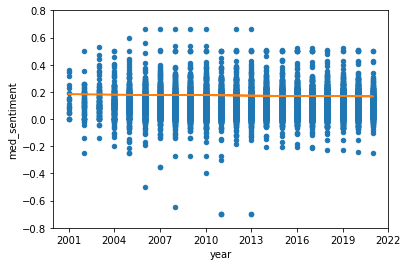

In [17]:
ax2 = new_df.plot(x='year', y='med_sentiment', kind='scatter')
ax2.plot(X, p2.const + p2.year * X)
ax2.set_xlim([new_df['year'].min()-1, new_df['year'].max()+1])
ax2.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax2.set_ylim([round(new_df['med_sentiment'].min()-0.1, 1), round(new_df['med_sentiment'].max()+0.1, 1)])
fig2 = ax2.get_figure()
fig2.savefig('English Results - Median.png')